# sample_prior_predictive
### What is the Prior Predictive Distribution?
- is the distribution of possible outcomes (data) that could be generated under the model,
- using only the prior distributions for the parameters.
- It helps you understand what your model believes about the data before seeing any actual observations.

                         - p(y)=∫p(y∣θ)p(θ)dθ
- where:

    - p(y∣θ)p(y∣θ) is the likelihood (data-generating process).
    - p(θ)p(θ) is the prior distribution for the parameters.
    - yy is the data.

### Purpose of sample_prior_predictive:
1. Check your priors:
    - Ensure that your priors are reasonable and produce plausible data.
2. Simulate data:
    - Generate synthetic data from the model to understand its behavior.
3. Debug your model:
    - Verify that the model is correctly specified before fitting it to real data.

### How to Use sample_prior_predictive:

Sampling: [mu, y]


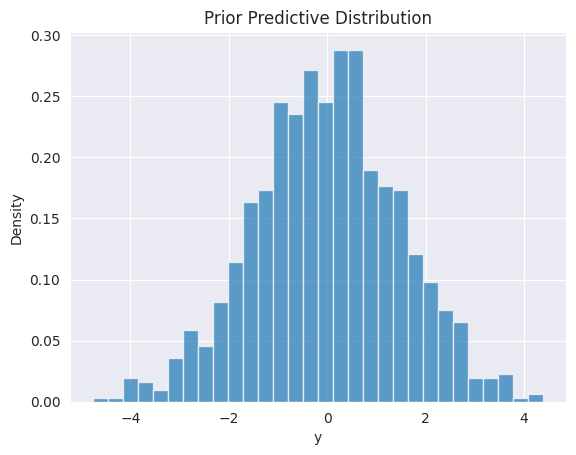

In [10]:
import pymc as pm
import numpy as np
import matplotlib.pyplot as plt

# Define a simple Bayesian model
with pm.Model() as model:
    # Prior for a parameter (e.g., mean of a Normal distribution)
    mu = pm.Normal("mu", mu=0, sigma=1)

    # Likelihood (data-generating process)
    y = pm.Normal("y", mu=mu, sigma=1, observed=None)  # No observed data yet

    # Sample from the prior predictive distribution
    prior_predictive = pm.sample_prior_predictive(samples=1000)

# Extract the prior predictive samples
prior_predictive_y = prior_predictive.prior["y"].values

# Plot the prior predictive distribution
plt.hist(prior_predictive_y.flatten(), bins=30, density=True, alpha=0.7)
plt.title("Prior Predictive Distribution")
plt.xlabel("y")
plt.ylabel("Density")
plt.show()


#### Key Points:
1. No observed data:
    - The observed argument in the likelihood is set to None because we are not using any real data.
2. Synthetic data:
    - The function generates samples of the data (y) based on the priors.
3. Model checking:
    - By examining the prior predictive distribution, you can verify whether your priors are reasonable and whether the model behaves as expected.

### Output:
- The output of sample_prior_predictive is a dictionary-like object containing samples from the prior predictive distribution.
- You can access the samples for each variable (e.g., y) and analyze or visualize them.

### When to Use:

- Before fitting the model: Use sample_prior_predictive to check your priors and ensure they produce realistic data.
- During model development: Use it to debug and refine your model structure.
- For educational purposes: It helps you understand the implications of your priors on the data-generating process.